Combine all PF optimisation tasks into one notebook, separated into sections by method, with small description of what each method is doing. Should be: extract data, process, both optimisations from "Covariance of Returns", VaR, MD, Simulate PF forecasts (In the "PO, VaR..." notebook)

# Portfolio Optimisiation, VaR, Monte Carlo Simulation + Trading Strategy
- Build a portfolio from a sample of M assets, simulate trials varying on number of assets and allocation weights, select for largest Sharpe Ratio.
- Determine VaR of built portfolio
- Generate Monte Carlo simulations of stochastic paths from portfolio
- Build basic trading strategy using path simulation

## Portfolio Optimisation

- Create 10 dummy stocks each with prices varying over 90 days, each according to previous lessons dummy data creation:
i.e. normal distribution of daily returns with unique mean $\mu$ and standard deviation $\sigma$), store in pandas dataframe called $sp$.
- Calculate daily returns for each stock ((day+1)/day)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
days = 90
port = 10

def create_stock(days):
  price_start = np.random.uniform(25,500)
  mean = np.random.uniform(0.95,1.05)
  var = np.random.uniform(0.01,0.05)
  # mean = (1/10)*np.random.standard_normal()+1
  # var = abs((1/10)*np.random.standard_normal()+0.05)
  stock_price = [price_start]
  new_price = price_start
  iter = 1
  for i in range(days-1):
      new_price = new_price * np.random.normal(mean, var)
      stock_price.append(new_price)
  return stock_price

def simulation(port,days):
  sp = pd.DataFrame()
  for iter in range(port):
    sp['stock ' + str(iter+1)] = create_stock(days)
  return sp

def generate_weights(port):
  weights  = np.random.dirichlet(np.ones(port),size=1)

  return weights

def calculate_ret_stats(sp_weighted):
  sp_final = sp_weighted.iloc[89:].sum(axis=1)
  mean = sp_weighted.mean()
  std = sp_weighted.std()

  return sp_final, mean, std

def sharpe_ratio(returns,rfr):
  mean = returns.mean().sum() - rfr
  sigma = returns.mean().std() 

  return mean/sigma



####A

- Select N arbitrary stocks, give arbitrary weight allocations (proportions) to each to make portfolio. (Total investment can be set to 1, or can be arbitrary investment total number).
- Create Pandas df. Use the allocation weights/totals and the stock price changes to get a column, for each stock, with the value of your stake in that stock for each day. (e.g. if 25% of Investment Total is invested in stock A on day 1, and stock A increases by 3% on day 2, then your value in A at day 2 would be 0.2575 in weight terms, or 0.2575 * Investment Total in total terms).
- Sum stake columns to get portfolio value. Determine mean and std of the portfolio daily returns, store trial to dictionary with respective Sharpe Ratio

####B
- Randomly sample $N$ trials of $m$ stocks, $m$ being between 3 and 6.
- Randomly allocate proportions of investment budget to selected stocks.
- Repeat above for each
- Determine best portfolio

In [ ]:
###A
trials = {}
port =10
days = 90
N=10

for iter in range(N):
  sp = simulation(port,days)
  sp_weighted = generate_weights(port)*(sp.pct_change()+1)
  final, mean, std = calculate_ret_stats(sp_weighted)
  sharpe_rat_port = sharpe_ratio(sp_weighted,0.1)*np.sqrt(90)
  trials[iter] = sharpe_rat_port
print(f'trials are: {trials}')


###B
trials = {}
port =np.random.randint(3,6)
days = 90
N=10
budget = 100000
port_weights = []


for iter in range(N):
  sp = simulation(port,days)
  weights = generate_weights(port)
  sp_weighted = budget*weights*(sp.pct_change()+1)
  final, mean, std = calculate_ret_stats(sp_weighted)
  sharpe_rat_port = sharpe_ratio(sp_weighted,0.1)*np.sqrt(90)
  trials[iter] = sharpe_rat_port
  port_weights.append(weights)


print(f'max is {max(trials, key=trials.get)}') #return trial
print(f'value is :{trials[max(trials, key=trials.get)]}') #return value
print(f'weights are: {port_weights[max(trials, key=trials.get)]}')



trials are: {0: 126.2692088490868, 1: 72.20157845565953, 2: 82.13697817193493, 3: 69.091200713003, 4: 117.99800436270853, 5: 107.41536931984791, 6: 88.74716614355145, 7: 107.78216273028768, 8: 93.66069719560909, 9: 122.09655019166948}
max is 2
value is :218.64160028695403
weights are: [[0.21209624 0.30776449 0.21867651 0.26146276]]


#Value at Risk (VaR)
- Import scipy.stats as ss
- Convert daily mean and std of portfolio returns into expected quarterly returns and std  (hint: std is sqrt of variance)
- Plot Probability Density Function (pdf) and Cumulative Density Function (cdf) of expected quarterly returns (Normal distribution of mean and std).
- Use the pdf/cdf  function and plot (plus an extra step) to determine the minimum loss that a company might expect to incur with a chance of 5%. In other words, when calculated: "This portfolio has a 5% chance of losing at least X% of its value in a given quarter.

In [ ]:
import scipy.stats as stats
days_ahead = 120


sp = simulation(port,days)
sp_weighted = generate_weights(port)*(sp.pct_change()+1)
final, mean, std = calculate_ret_stats(sp_weighted)
exp_mean = mean * days_ahead
exp_std = std*np.sqrt(days_ahead)

#Monte Carlo Simulation of potfolio

In [ ]:
import numpy as np

# Portfolio parameters
mean = 0.005
std = 0.06
start_price = 1000

# Simulation parameters
num_sims = 10000
projection_days = 100

In [ ]:
# Run simulation
sims = []
for sim in range(num_sims):
    projection = [start_price]
    new_price = start_price
    daily_inc = np.random.normal(mean,std, projection_days)
    for day in range(projection_days):
        new_price *= (1+daily_inc[day])
        projection.append(new_price)
    sims.append(projection)
    
sims = np.array(sims)
sim_average = sims.mean(axis = 0)

#Trading Strategy

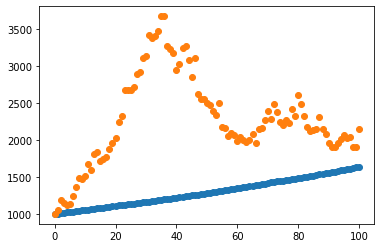

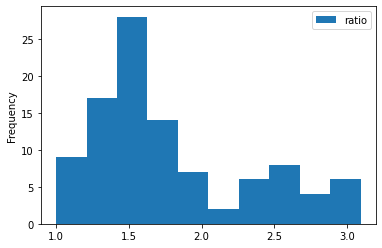

In [ ]:
# Dummy data for actual price of protfolio
actual_price = [start_price]
new_price = start_price
daily_inc = np.random.normal(mean,std, projection_days)

for day in range(projection_days):
    new_price *= (1+daily_inc[day])
    actual_price.append(new_price)

# Plot actual vs sim
plt.scatter(range(projection_days+1), sim_average)
plt.scatter(range(projection_days+1), actual_price)

#Dataframe with comparison and ratio of actual vs sim
sp = pd.DataFrame(data = np.array([sim_average, actual_price]).T, columns = ['sim','actual'])
sp['sim_greater'] = (sp['sim'] > sp['actual']).astype(int)
sp['ratio'] = sp['actual'] / sp['sim']
sp[['ratio']].plot(kind = 'hist')

## Make Moving averages
### Make simple andard moving average (SMA)
Use pandas rolling average function for 5, 20, 50 days, add column to sp for each


### Make exponential moving average (EMA)
- Use pandas exponential rolling average function for 5, 20, 50 days, add column to sp for each.
- Make 3 new columns, EMA >= SMA, one for each day value.

### Add in consecutive wins and losses metric
In a previous task, you looked at quantifying how many consecutive days of losses resulted in the likeliest probability that the next day would be a win. Add this to the code here:
- For consecutive losses to a win
- Consecutive wins to a loss
- Add new columns to sp for each, give a row the value of 1 if it is the last day in the predicted cycle for each (wins to loss, losses to win)

In [ ]:
sp

,sim,actual,sim_greater,ratio
0,1000.000000,1000.000000,0,1.000000
1,1005.009374,1054.769802,0,1.049512
2,1009.297031,1185.723511,0,1.174801
3,1014.913762,1151.205596,0,1.134289
4,1020.361764,1119.131969,0,1.096799
...,...,...,...,...
96,1606.304841,2023.092625,0,1.259470
97,1614.997559,2044.866481,0,1.266173
98,1623.470147,1913.108756,0,1.178407
99,1630.012707,1903.414951,0,1.167730


### Take new columns: Sim_greater, cons_win, cons_loss, EMA>= SMA (x3), and create new features using: 
https://www.youtube.com/watch?v=TKnpSD1X_gY

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Take one of the new features, what does it signify?

Add in column for daily increase (1) or decrese (0)
log reg new cols to predict daily increase col